# Traffic Mortality in the US roads


While the rate of fatal road accidents has been decreasing steadily since the 80s, the past ten years have seen a stagnation in this reduction. Coupled with the increase in number of miles driven in the nation, the total number of traffic related-fatalities has now reached a ten year high and is rapidly increasing.
By looking at the demographics of traﬃc accident victims for each US state, we find that there is a lot of variation between states. Now we want to understand if there are patterns in this variation in order to derive suggestions for a policy action plan. In particular, instead of implementing a costly nation-wide plan we want to focus on groups of states with similar profiles.

Our goal here is to give suggestions to how can we reduce the fatel accedents while analysing the data we have. 

Step 1: Importing libraries and Dataset

In [1]:
#Importing reqiured Libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#importing the datasets for our project

milesDriven = pd.read_csv("miles-driven .csv",sep='|')

#Road Accidents dataset starts from row 10
roadAccidents = pd.read_csv("road-accidents .csv",sep='|',skiprows=9)

In [3]:
milesDriven.head()

,state,million_miles_annually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784


* million_miles_annually : is the amount of miles driven by each US state 

In [4]:
roadAccidents.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89


* drvr_fatl_col_bmiles = Number of drivers involved in fatal collisions per billion miles (2011)
* perc_fatl_speed = Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding (2009)
* perc_fatl_alcohol = Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired (2011)
* perc_fatl_1st_time = Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents (2011)

### First of all lets Investegate each Dataset seperatly

#### step 2- Data Investegation

In [5]:
milesDriven.describe()

,million_miles_annually
count,51.000000
mean,57851.019608
std,59898.414088
min,3568.000000
25%,17450.000000
50%,46606.000000
75%,71922.500000
max,320784.000000


we can see that ther's a big diffrence between the min and max (3568 and 320784 almost 95 times) which means that we have very difffrent groups of data the we can seperate later to (clusters)

In [6]:
milesDriven.isnull().sum()

state                     0
million_miles_annually    0
dtype: int64

we have no null values in this dataset

In [7]:
roadAccidents.describe()

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
count,51.000000,51.000000,51.000000,51.00000
mean,15.790196,31.725490,30.686275,88.72549
std,4.122002,9.633438,5.132213,6.96011
min,5.900000,13.000000,16.000000,76.00000
25%,12.750000,23.000000,28.000000,83.50000
50%,15.600000,34.000000,30.000000,88.00000
75%,18.500000,38.000000,33.000000,95.00000
max,23.900000,54.000000,44.000000,100.00000


### we can start to notice some details here :
* there is a big diff between states fatel accedents per billion miles (from 5.9% up to 23.9% almost 4 times the amount)
* up to 54% of the accedents are caused while speeding which might be obvious, however in some cases only 13% were speeding which suggests more investegation
* is alcholic and speeding in relation ?
* looks like most of the fatel accednts are by drivers who have been never in any accedents before (76% and up to 100% in some cases), which also suggests many things to investegate. 

In [8]:
roadAccidents.isnull().sum()

state                   0
drvr_fatl_col_bmiles    0
perc_fatl_speed         0
perc_fatl_alcohol       0
perc_fatl_1st_time      0
dtype: int64

also no nulls in our dataset

In [9]:
## checking if the states names are identical or have diffrent values
a = milesDriven.state == roadAccidents.state
a.unique()

array([ True])

we can compine both the datasets into 1 dataset

In [10]:
df = roadAccidents.merge(milesDriven)
df.tail()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,million_miles_annually
46,Virginia,12.7,19,27,88,80974
47,Washington,10.6,42,33,86,56955
48,West Virginia,23.8,34,28,87,18963
49,Wisconsin,13.8,36,33,84,58554
50,Wyoming,17.4,42,32,90,9245


we've now merged our datasets into 1 data set, lets try and investegate this new one.


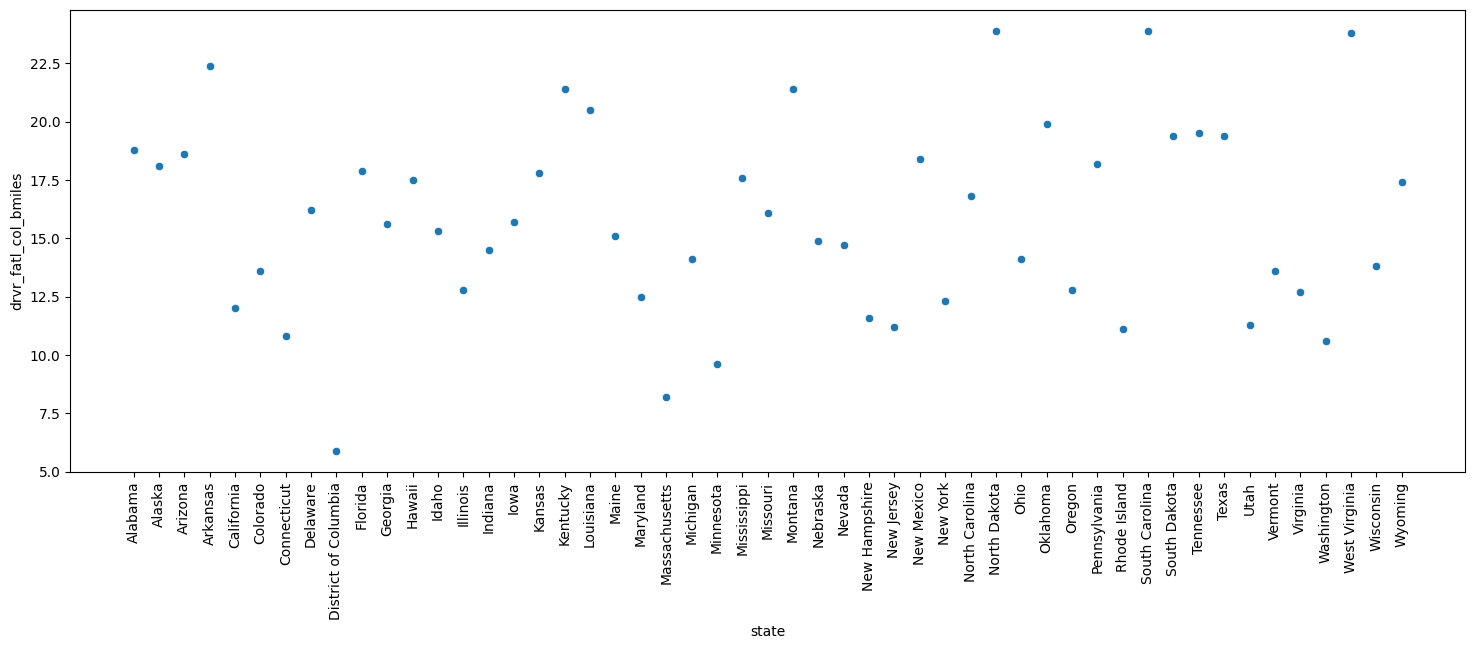

In [11]:
f, ax = plt.subplots(figsize=(18, 6))
plt.xticks(rotation=90)
fig = sns.scatterplot(x= df.state , y= df.drvr_fatl_col_bmiles)


District of columbia has lowest number of accedents fetality per Billion miles

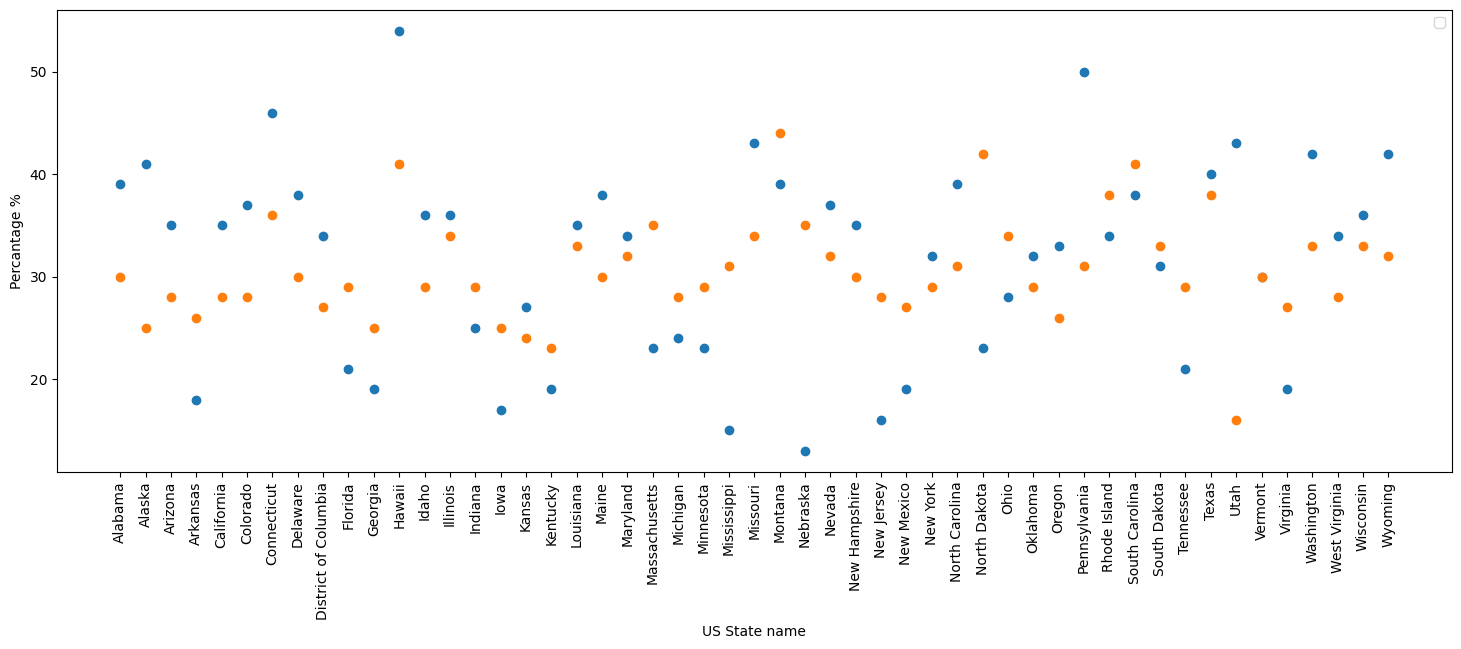

In [12]:
figure(figsize=(18, 6))
plt.xticks(rotation=90)
plt.legend(['perc_fatl_speed','perc_fatl_alcohol'])
plt.xlabel('US State name')
plt.ylabel('Percantage %')
plt.scatter(x = df.state , y=df.perc_fatl_speed)
plt.scatter(x = df.state , y=df.perc_fatl_alcohol)


### we can see some new information, for example:
* Nebraska is the lowest state in fatel accedents because of speed but it's one of the highest in terms of Alcohol, However looking at Nebraska geography and roads we can see that it has many hills, vallyes, and it snows very often in the winter so accedents in such circomestances can be fetal even at normal speeds. 

* North Dakota on the other hand suffers from alchol much more than speeding fatellity, but looking at Americ's Heatlh Ranking (united health foundation) ranking of Excessive Drinking
measures in 2015 per state, we can see that North Dakota was the worst satate to rank in order of Excessive Drinking by 25% from the adults who reported binge drinking (four or more [females] or five or more [males] drinks on one occasion in the past 30 days) or heavy drinking (eight or more [females] or 15 or more [males] drinks per week)

* also Hawaii is high on both causes, which might suggest that drinking and speeding is commin in Hawaii and need to be limited more.

### Also from doing reaserches, states with most speeding tickets are actually moderate-low on speeding fatel deaths, which might conclude that speeding it self isn't really the main reason, also that other states like (Hawaii for example with most speeding fetal accedents) has actually the lowest speed limits in the US, so looking for other reasons or realtions is reqiured.



resources :
* https://www.americashealthrankings.org/explore/annual/measure/ExcessDrink/state/MT?edition-year=2015

* https://en.wikipedia.org/wiki/Nebraska

* https://www.foxla.com/news/here-are-the-10-us-states-with-the-most-speeding-tickets

* https://en.wikipedia.org/wiki/Speed_limits_in_the_United_States_by_jurisdiction#Hawaii

Text(0, 0.5, 'perc_fatl_1st_time')

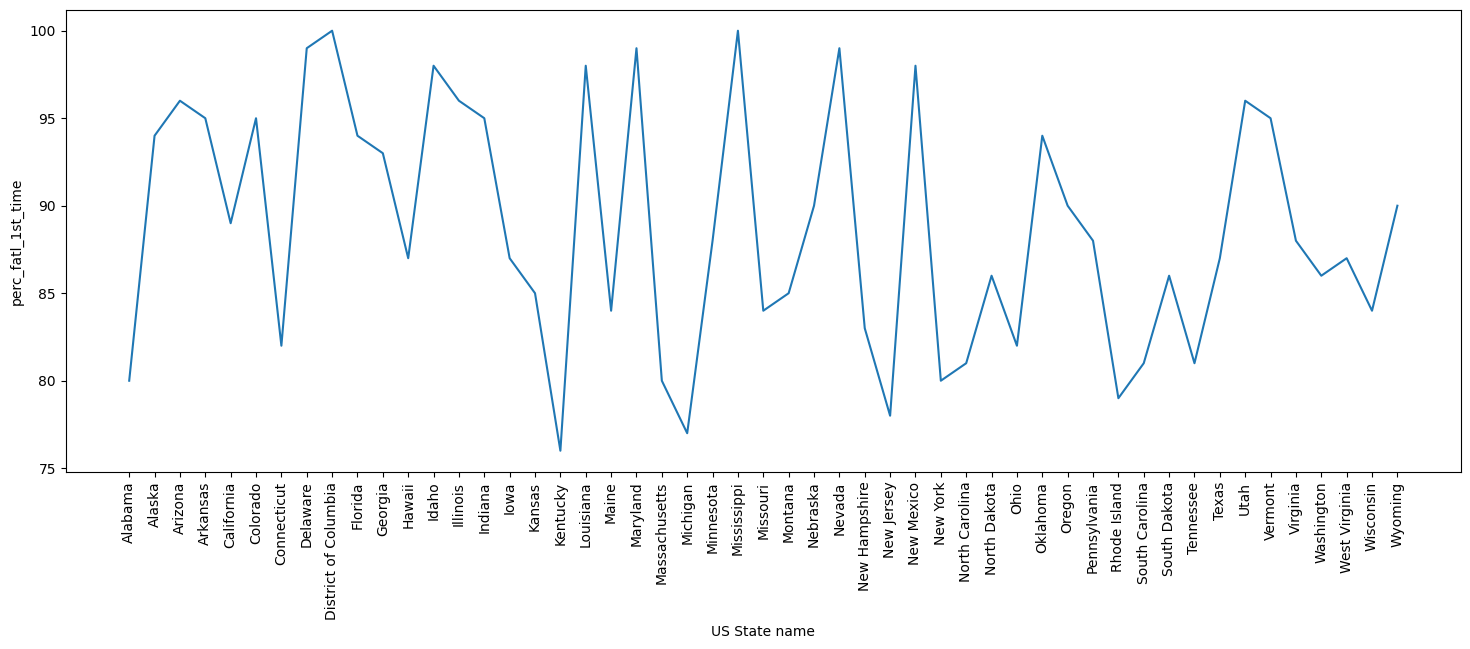

In [13]:
figure(figsize=(18, 6))
plt.xticks(rotation=90)
plt.plot(df.state, df.perc_fatl_1st_time)
plt.xlabel('US State name')
plt.ylabel('perc_fatl_1st_time')

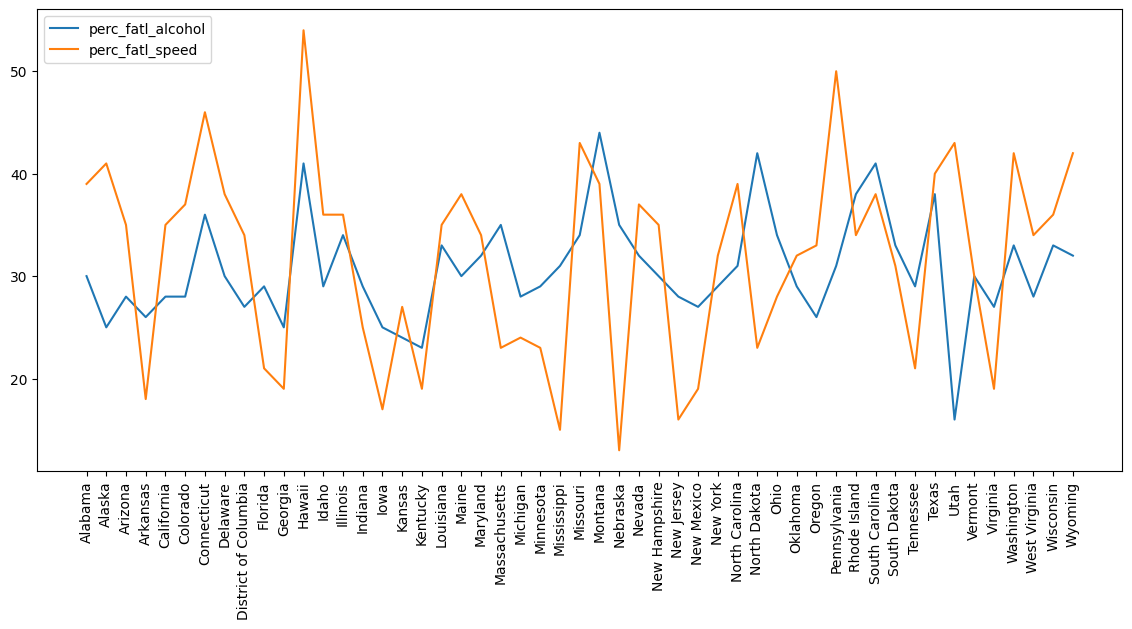

In [14]:
reldf = df.groupby('state')['perc_fatl_alcohol','perc_fatl_speed'].mean()
figure(figsize=(14, 6))
plt.xticks(rotation=90)
plt.plot(reldf)
plt.legend(['perc_fatl_alcohol','perc_fatl_speed'], loc='upper left')


we can see some patterns and simular trends that suggests that alcohol and speeding might have a realtion (when people get drunk they might be speeding over the limit), however more data is needed in order to give a clear opinion as this is not the case in all states.

### Correlatin Matrix


In [15]:
corr_matrix = df.corr()
corr_matrix

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,million_miles_annually
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942,-0.077133
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066,-0.043199
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455,-0.034561
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000,-0.128928
million_miles_annually,-0.077133,-0.043199,-0.034561,-0.128928,1.000000


We can start to see basic information about how each of the features are related to each other, we will continue to investegate more into this.

### Step 3: doing some Feature Engineering

In [16]:
# lets try and get finite number of fatel accedents rather than just a percentage. 

# total fatel speed accedents per billion miles
tot_fatl_spd_bmils = (df['perc_fatl_speed'] / 100 ) * df['drvr_fatl_col_bmiles']

# total fatel alcohol accedents per billion miles
tot_fatl_alchl_bmils = (df['perc_fatl_alcohol'] / 100) * df['drvr_fatl_col_bmiles']

df_features = df.copy()
df_features['tot_fatl_spd_bmils'] = tot_fatl_spd_bmils
df_features['tot_fatl_alchl_bmils'] = tot_fatl_alchl_bmils
df_features.tail()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,million_miles_annually,tot_fatl_spd_bmils,tot_fatl_alchl_bmils
46,Virginia,12.7,19,27,88,80974,2.413,3.429
47,Washington,10.6,42,33,86,56955,4.452,3.498
48,West Virginia,23.8,34,28,87,18963,8.092,6.664
49,Wisconsin,13.8,36,33,84,58554,4.968,4.554
50,Wyoming,17.4,42,32,90,9245,7.308,5.568


### Addding new features like population of each state at 2010, might be helpful, We are trying to webscrape from wikipedia 

In [17]:
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML documents

In [18]:
# get the response in the form of html
wikiurl="https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_population"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
print(response.status_code)

#It is not legal to scrape any website, so we check the status code. 200 shows that you can go ahead and download it.

200


In [19]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
indiatable=soup.find('table',{'class':"wikitable"})

In [20]:
df_wiki_pop =pd.read_html(str(indiatable))
# convert list to dataframe
df_wiki_pop=pd.DataFrame(df_wiki_pop[0])
df_wiki_pop.head()


Rank      State or territory Census population[8][a]                \
  2022 2020 State or territory     July 1, 2022 (est.) April 1, 2020   
0  1.0  1.0         California              39029342.0      39538223   
1  2.0  2.0              Texas              30029572.0      29145505   
2  3.0  3.0            Florida              22244823.0      21538187   
3  4.0  4.0           New York              19677151.0      20201249   
4  5.0  5.0       Pennsylvania              12972008.0      13002700   

                Change, 2010–2020[8][a]           \
  April 1, 2010                       %     Abs.   
0      37253956                   6.13%  2284267   
1      25145561                  15.91%  3999944   
2      18801310                  14.56%  2736877   
3      19378102                   4.25%   823147   
4      12702379                   2.36%   300321   

  House of Reps. from the 2022 elections          \
                                   Seats       %   
0                                     52  11.95%   
1                                     38   8.74%   
2                                     28   6.44%   
3                                     26   5.98%   
4                                     17   3.91%   

  Pop. per elec. vote, 2020[b] from the 2022 elections  \
  Pop. per elec. vote, 2020[b] from the 2022 elections   
0                                             732189     
1                                             728638     
2                                             717940     
3                                             721473     
4                                             684353     

  Census pop. per seat[a]         % of the total U.S. pop.[c]           \
                From 2022    2010                        2020     2010   
0                  760350  702905                     11.800%  11.908%   
1                  766987  698488                      8.698%   8.038%   
2                  769221  696345                      6.428%   6.010%   
3                  776971  717707                      6.029%   6.194%   
4                  764865  705688                      3.881%   4.060%   

  % of Elec. Coll.  
  % of Elec. Coll.  
0           10.04%  
1            7.43%  
2            5.58%  
3            5.20%  
4            3.53%

#### we only need the population at 2010 column and, state name column 

In [21]:
# we have multi-lever index on columns so we gonna drop level 0
df_wiki_pop.columns = df_wiki_pop.columns.droplevel(0)

# choose the columns we need 
df_wiki_pop = df_wiki_pop[['State or territory','April 1, 2010']]

In [22]:
# renaming the columns
df_wiki_pop.columns = ['state' , 'population']
df_wiki_pop.tail()

,state,population
55,Northern Mariana Islands[13],53883
56,Contiguous United States,306675006
57,The 50 states,308143815
58,The 50 states and D.C.,308745538
59,Total United States,312846492


In [23]:
# merging the datasets to get our new dataset 
df_features = df_features.merge(df_wiki_pop)

In [24]:
df_features.tail()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,million_miles_annually,tot_fatl_spd_bmils,tot_fatl_alchl_bmils,population
46,Virginia,12.7,19,27,88,80974,2.413,3.429,8001024
47,Washington,10.6,42,33,86,56955,4.452,3.498,6724540
48,West Virginia,23.8,34,28,87,18963,8.092,6.664,1852994
49,Wisconsin,13.8,36,33,84,58554,4.968,4.554,5686986
50,Wyoming,17.4,42,32,90,9245,7.308,5.568,563626


In [25]:
df_features.corr()

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,million_miles_annually,tot_fatl_spd_bmils,tot_fatl_alchl_bmils,population
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942,-0.077133,0.611548,0.852613,-0.132703
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066,-0.043199,0.754772,0.138586,0.001963
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455,-0.034561,0.386394,0.662212,-0.026075
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000,-0.128928,-0.030694,-0.119346,-0.140425
million_miles_annually,-0.077133,-0.043199,-0.034561,-0.128928,1.000000,-0.065709,-0.075398,0.984192
tot_fatl_spd_bmils,0.611548,0.754772,0.386394,-0.030694,-0.065709,1.000000,0.669719,-0.066408
tot_fatl_alchl_bmils,0.852613,0.138586,0.662212,-0.119346,-0.075398,0.669719,1.000000,-0.111514
population,-0.132703,0.001963,-0.026075,-0.140425,0.984192,-0.066408,-0.111514,1.000000


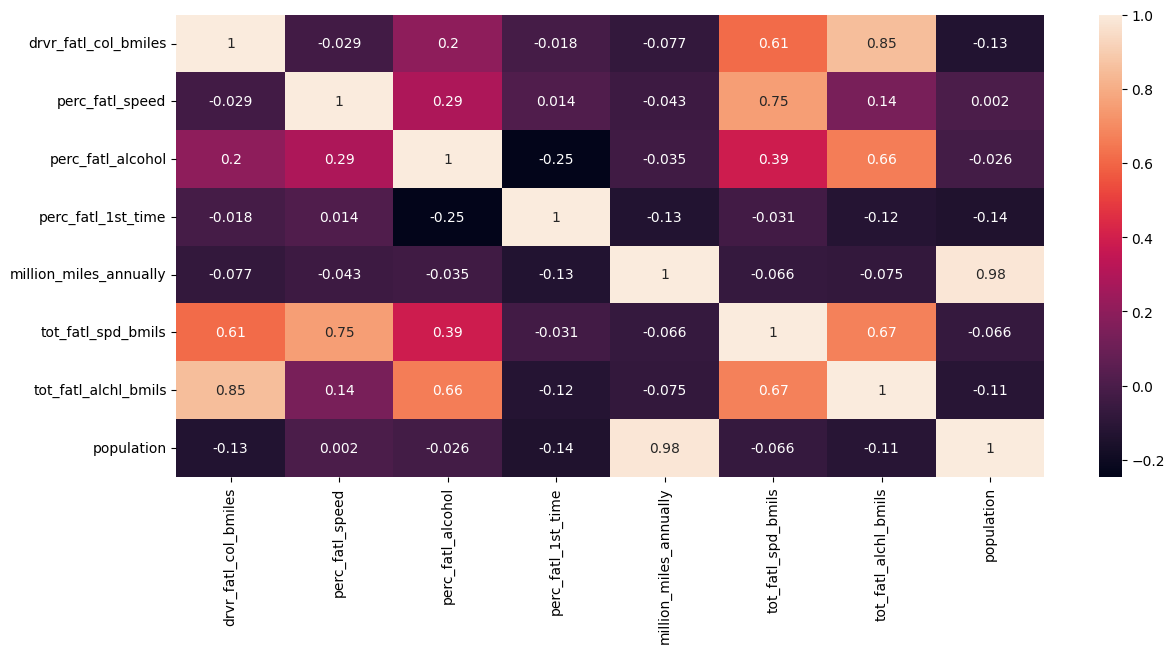

In [26]:
# plotting our corr matrix so we can get better insights
figure(figsize=(14, 6))
ax = sns.heatmap(df_features.corr(), annot=True)

### As we can see, we got some new and diffrent observations for our data, 

* corr of total fatel alcohol deaths is above 0.85 which is very strong. 
* obviously we have 0.98 corr between population and million miles driven, as the more population there is, the more miles driven.
* total of fetal alcohol and fetal speed is 0.67 in corr which is understanable as noticed from the trends in the plots above.
* population didn't really add much value, but it's worth the shot anyways.

### Step 4- Fitting a multivariate linear regression model

In [27]:
# while investegating the raltions, we can't keep both columns tot_fatl_spd_bmils and tot_fatl_alchl_bmils, cause they are drived from the target variable which would bias the model.
df_features_train = df_features.copy()
df_features_train = df_features_train.set_index('state')
df_features_train = df_features_train.drop(columns=['million_miles_annually','population','tot_fatl_alchl_bmils','tot_fatl_spd_bmils'], axis = 1)
y = df_features_train['drvr_fatl_col_bmiles']
X = df_features_train.drop(axis = 1 , columns='drvr_fatl_col_bmiles')

In [28]:
X.head()

,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
state,,,
Alabama,39,30,80
Alaska,41,25,94
Arizona,35,28,96
Arkansas,18,26,95
California,35,28,89


In [29]:
model_ols =  linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)
model_ols.fit(X,y) 
# fit() method is used for training the model

LinearRegression()

In [30]:
coef = model_ols.coef_
feats = model_ols.feature_names_in_
print('featurs: ' , model_ols.feature_names_in_ , '\n   coef= ', coef)

featurs:  ['perc_fatl_speed' 'perc_fatl_alcohol' 'perc_fatl_1st_time'] 
   coef=  [-0.04180041  0.19086404  0.02473301]


#### we can notice that perc_fatl_1st_time have a postive regression coefficient while having a negative correlation coefficient, which means that the relation is actually masking a positve effect on another negative feature while itself having a positive effect on target.

### step 5- performing PCA on the standrized data 

In [31]:
#standrizing the data before applying PCA is a must
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=[X.columns]).set_index(df['state'])


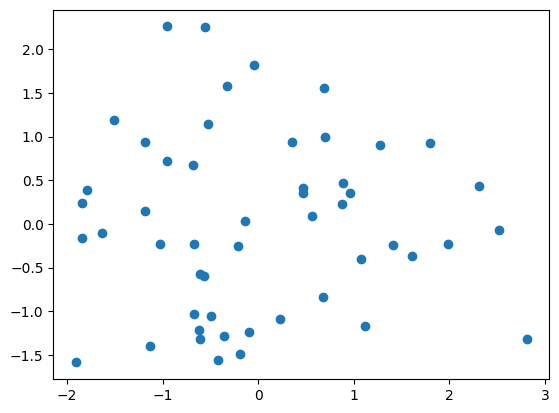

In [32]:
# Applying PCA function on data with 2 components

pca = PCA(n_components = 2)
X_PCA = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_

#plotting the points
plt.scatter(X_PCA[:,0],X_PCA[:,1])

it's not very obvious to detect the groups of simularity by eye so we might use the KMeans clusters, so, we will try the elbow methodeto find the optimal number of clusters.

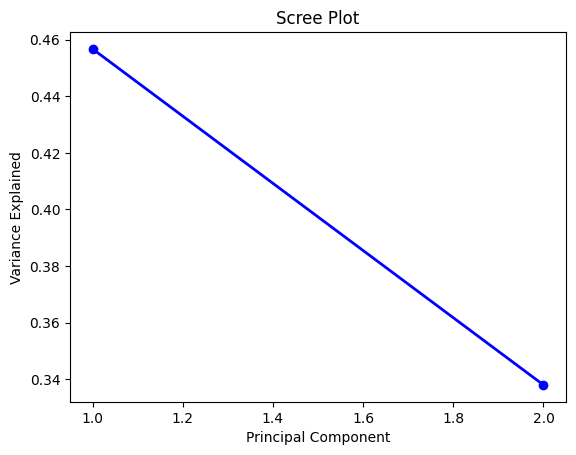

In [33]:
#plotting the elbow methode
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, explained_variance, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

sadly we don't have a clear elbow point :(      
    so we will choose either2 or 3 clusters to work with.

### Step 6- using KMeans to cluster our data

In [34]:
# Initalizing KMeans with 3 clusters
model = KMeans(n_clusters=3, random_state=42) 

#fitting the model to our PCA data
X_kmeans = model.fit(X_PCA)

In [35]:
#checking the labels
X_kmeans.labels_

array([2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 1, 2, 1, 0,
       0, 0, 1, 2, 2, 0, 1, 2, 0, 1, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 0, 2,
       1, 1, 0, 2, 1, 2, 2])

Of course we can't get much information from the array alone, so lets 3d plot our cluster points.

Text(0.5, 0.92, 'K-Means Clusters for the Iris Dataset')

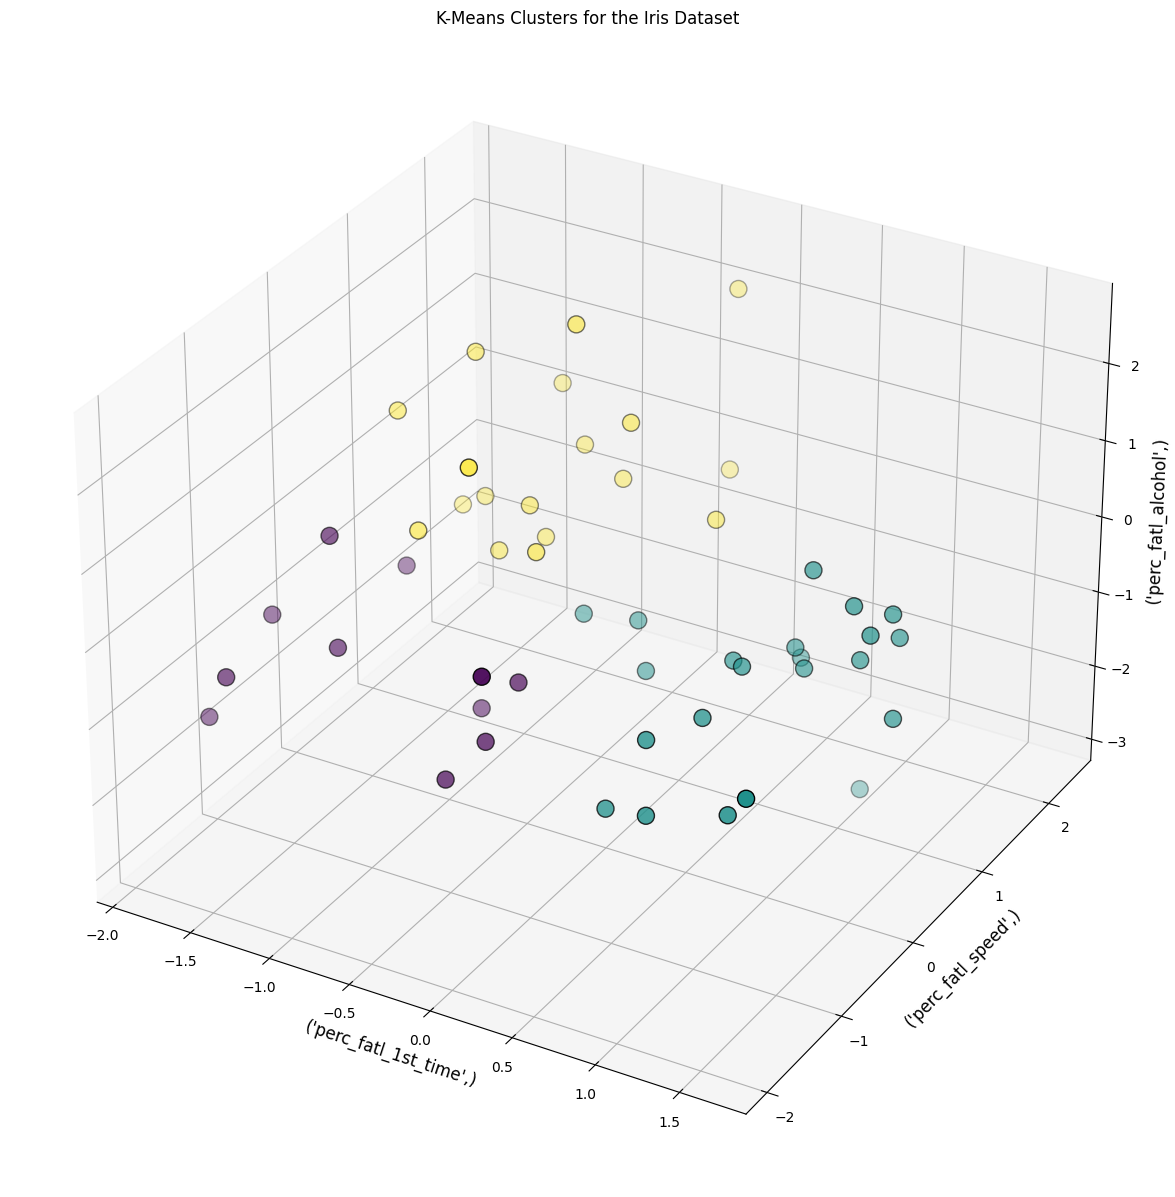

In [36]:
names = X.columns

#visualising the data
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(projection='3d')
ax1.scatter(X.iloc[:,2], X.iloc[:,0], X.iloc[:,1],
            c=X_kmeans.labels_, 
           edgecolor="k", s=150)


ax1.set_xlabel(names[2], fontsize=12)
ax1.set_ylabel(names[0], fontsize=12)
ax1.set_zlabel(names[1], fontsize=12)
ax1.set_title("K-Means Clusters for the Iris Dataset", fontsize=12)


In [37]:
#now after we clustred the data lets add a new feature to our dataset indecating the cluster of each state
X_culsters = X.copy()
X_culsters['cluster'] = X_kmeans.labels_

In [38]:
# now we have the cluster as a feature in our dataset, can we get information from that?
X_culsters.head(10)

,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,cluster
state,,,,
Alabama,0.762645,-0.135050,-1.266117,2
Alaska,0.972321,-1.118982,0.765361,1
Arizona,0.343293,-0.528623,1.055572,1
Arkansas,-1.438953,-0.922196,0.910466,1
California,0.343293,-0.528623,0.039833,1
Colorado,0.552969,-0.528623,0.910466,1
Connecticut,1.496511,1.045670,-0.975906,2
Delaware,0.657807,-0.135050,1.490888,1
District of Columbia,0.238455,-0.725409,1.635994,1


With the data standrized, it might be hard to fully understand why is it clustred like that, so we go back to our original dataset 

In [39]:
df_features['cluster'] = X_kmeans.labels_
df_features.head(10)

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,million_miles_annually,tot_fatl_spd_bmils,tot_fatl_alchl_bmils,population,cluster
0,Alabama,18.8,39,30,80,64914,7.332,5.640,4779736,2
1,Alaska,18.1,41,25,94,4593,7.421,4.525,710231,1
2,Arizona,18.6,35,28,96,59575,6.510,5.208,6392017,1
3,Arkansas,22.4,18,26,95,32953,4.032,5.824,2915918,1
4,California,12.0,35,28,89,320784,4.200,3.360,37253956,1
5,Colorado,13.6,37,28,95,46606,5.032,3.808,5029196,1
6,Connecticut,10.8,46,36,82,31197,4.968,3.888,3574097,2
7,Delaware,16.2,38,30,99,9028,6.156,4.860,897934,1
8,District of Columbia,5.9,34,27,100,3568,2.006,1.593,601723,1
9,Florida,17.9,21,29,94,191855,3.759,5.191,18801310,1


In [40]:
#assigning colors for our clusters using list comprehensions, baiscally, class 0 is yellow , class 1 is blue, and class 2 is green.
df_features['cluster_color'] = ['yellow' if x ==0 else 'blue' if x==1 else 'green' for x in df_features['cluster']]
df_features.sample(5)

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,million_miles_annually,tot_fatl_spd_bmils,tot_fatl_alchl_bmils,population,cluster,cluster_color
15,Iowa,15.7,17,25,87,31274,2.669,3.925,3046355,0,yellow
44,Utah,11.3,43,16,96,26222,4.859,1.808,2763885,1,blue
36,Oklahoma,19.9,32,29,94,47464,6.368,5.771,3751351,1,blue
35,Ohio,14.1,28,34,82,111990,3.948,4.794,11536504,2,green
28,Nevada,14.7,37,32,99,24189,5.439,4.704,2700551,1,blue


Text(0.5, 0.92, 'K-Means Clusters')

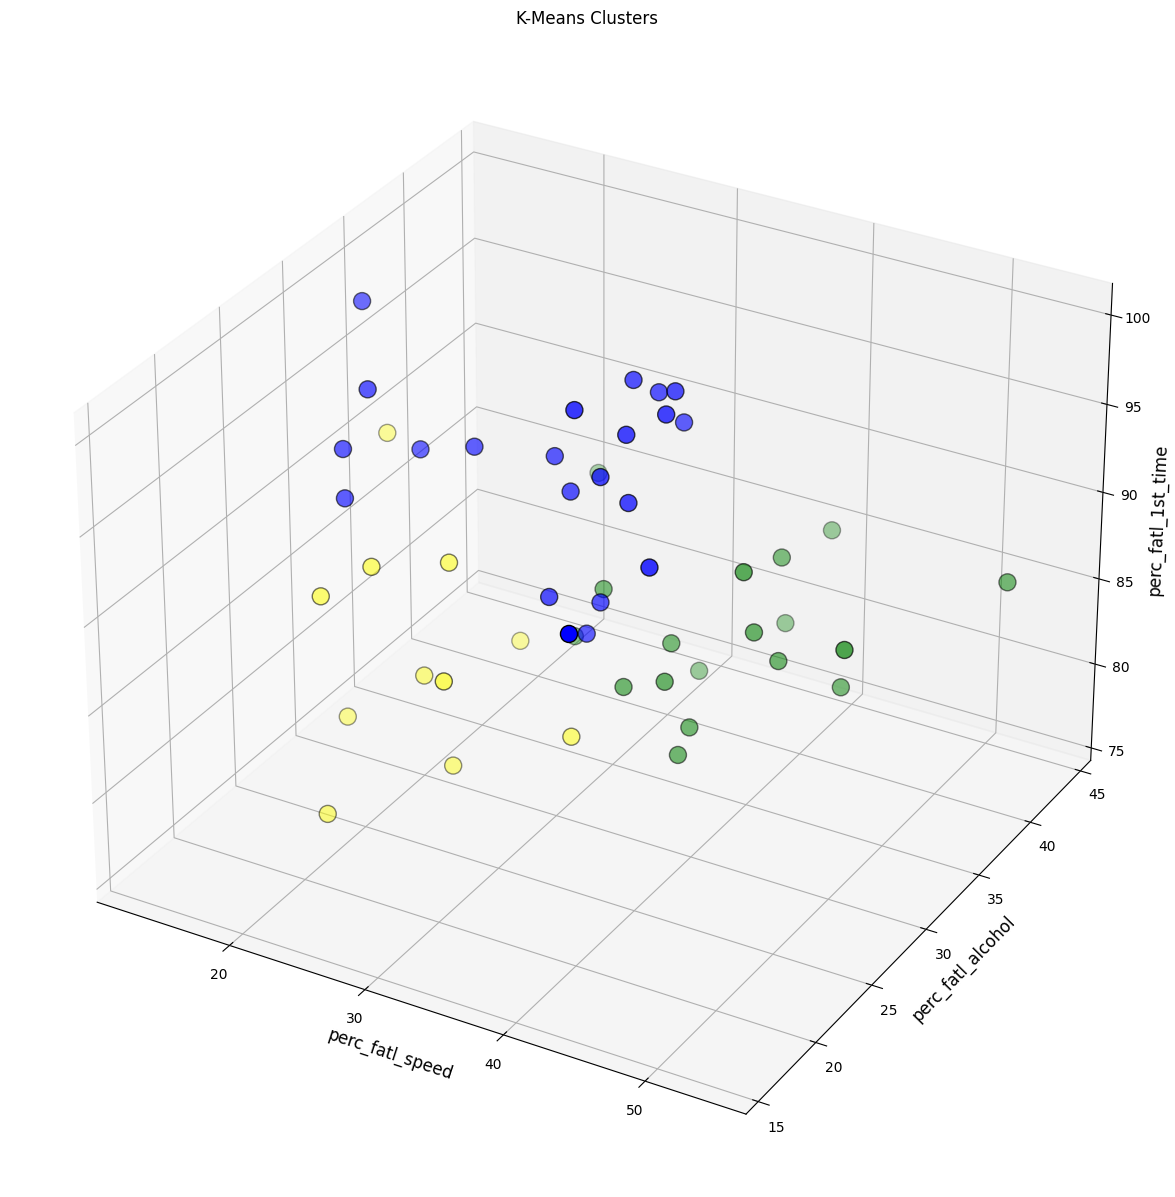

In [41]:
names = df_features.columns
#Visualizing the data clusters using 3d scatter plots
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(projection='3d')
ax1.scatter(df_features.iloc[:,2], df_features.iloc[:,3], df_features.iloc[:,4],
            c=df_features['cluster_color'], 
           edgecolor="k", s=150)


ax1.set_xlabel(names[2], fontsize=12)
ax1.set_ylabel(names[3], fontsize=12)
ax1.set_zlabel(names[4], fontsize=12)
ax1.set_title("K-Means Clusters", fontsize=12)



From what we see we can now get better insights of the clusters we have per states group,
* For cluster 0 'in yellow' (Virginia,Kentucky, ...etc), they mainly share that they are more likley to not be 1st time accedents (less than 85% are 1st time), with lower speed and moderate to high alcohol based accedents.
* for cluster 1 'in blue'  (California, Florida, ...etc) , it's the states with too high alcohol based accedents and low to moderate speed ones, also most of the accdents are 1st time accedents (mostly more than 90%).
* finally for cluster 2 'in green' (North Carolina, Alabama, ... etc) , it's the states with very high alcohol and speed based accedents, and less 1st time accedents (mostly less than 80%)


# Step 7- Making a decision 

now we gonna try to calculate the total actual accedents fatals for each state then sum them up to the cluster level, to choose which category to look up first 

In [42]:
#total deaths is equal to drvr_fatl_col_bmiles devided by 1 billion and then multiplied by million_miles_annually and 1 million
df_features['total_actual_deaths'] = ((df_features['drvr_fatl_col_bmiles']/1000000000 ) * (df_features['million_miles_annually'] * 1000000)).astype(int)
df_features.tail()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,million_miles_annually,tot_fatl_spd_bmils,tot_fatl_alchl_bmils,population,cluster,cluster_color,total_actual_deaths
46,Virginia,12.7,19,27,88,80974,2.413,3.429,8001024,0,yellow,1028
47,Washington,10.6,42,33,86,56955,4.452,3.498,6724540,2,green,603
48,West Virginia,23.8,34,28,87,18963,8.092,6.664,1852994,1,blue,451
49,Wisconsin,13.8,36,33,84,58554,4.968,4.554,5686986,2,green,808
50,Wyoming,17.4,42,32,90,9245,7.308,5.568,563626,2,green,160


<Axes: xlabel='cluster', ylabel='total_actual_deaths'>

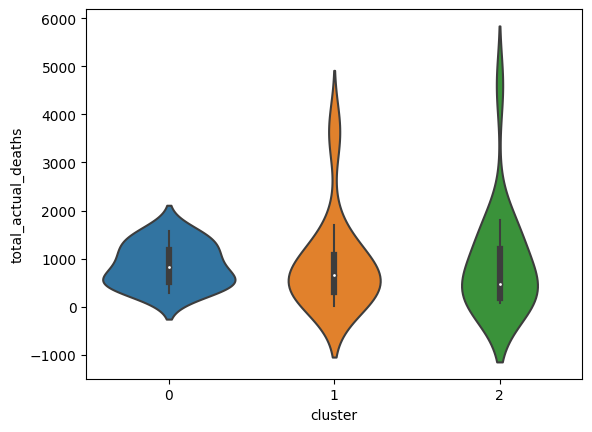

In [43]:
#using violin plot to visualize the data
sns.violinplot(data=df_features, y="total_actual_deaths", x="cluster")

We can see that cluster 1 and 2 are the ones with the most fatal accedents.

In [44]:
#trying to get the exact numbers
cluster0 = 0
cluster1 = 1
cluster2 = 2
for i,v in enumerate(df_features.values):
    if v[9] == 0:
        cluster0 += v[11]
    if v[9] == 1:
        cluster1 += v[11]        
    if v[9] == 2:
        cluster2 += v[11]   
cluster_total_deaths = {'cluster 0' : cluster0 , 'cluster 1' : cluster1 , 'cluster 2':cluster2}

In [45]:
cluster_total_deaths

{'cluster 0': 9462, 'cluster 1': 19756, 'cluster 2': 16399}

### We can see that cluster  1 has the most fatals amongest all, then cluster 2, and finaly 0, Even tho all clusters need more investegations, we will focus more on Cluster 1:

* Cluster 1 is the states with too high alcohol based accedents and low to moderate speed ones, also most of the accdents are 1st time accedents (mostly more than 90%):


    based on that we might suggest doing continous alcohol blood levels tests on the drivers, specially on events days and weekends to reduce the chance of driving while uner the effect of alcohol consumbtion.
    I also suggest gathering more data about the roads, as most of the accedents are on less speeds than usual, which might suggest bad roads(missing road signs, roads geography, road lightning, ...etc).

        Also it would help a lot to gather more information and data about roads, drivers complaints, depression levels in each state(maybe some of the accedents are suicide ones), and more targeted informations about the type of accedents and drivers informations. 

